Let's go flower picking!

The iris dataset is one of the earliest datasets used for classification.

Our goal is to find patterns to classify the iris flower into one of three species:
- setosa
- versicolor
- virginica

We are given some iris flowers and their:
- sepal length
- sepal width
- petal length
- petal width

1. Import libraries

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


2. Prepare data

In [19]:
# Step 1: Load data from the 'iris.data' file
df = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# Step 2: Convert categorical species names to numerical values
label_encoder = LabelEncoder()
df['species'] = label_encoder.fit_transform(df['species'])

# Step 3: Split the dataset into features (X) and target (y)
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

# Step 4: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

3. Training

In [20]:
model = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
model.fit(X_train, y_train)

Perceptron(random_state=42)

4. Test/Evaluation

Accuracy: 36.67%

Confusion Matrix:
[[10  0  0]
 [ 9  0  0]
 [10  0  1]]

Classification Report:
                 precision    recall  f1-score   support

    Iris-setosa       0.34      1.00      0.51        10
Iris-versicolor       0.00      0.00      0.00         9
 Iris-virginica       1.00      0.09      0.17        11

       accuracy                           0.37        30
      macro avg       0.45      0.36      0.23        30
   weighted avg       0.48      0.37      0.23        30



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  

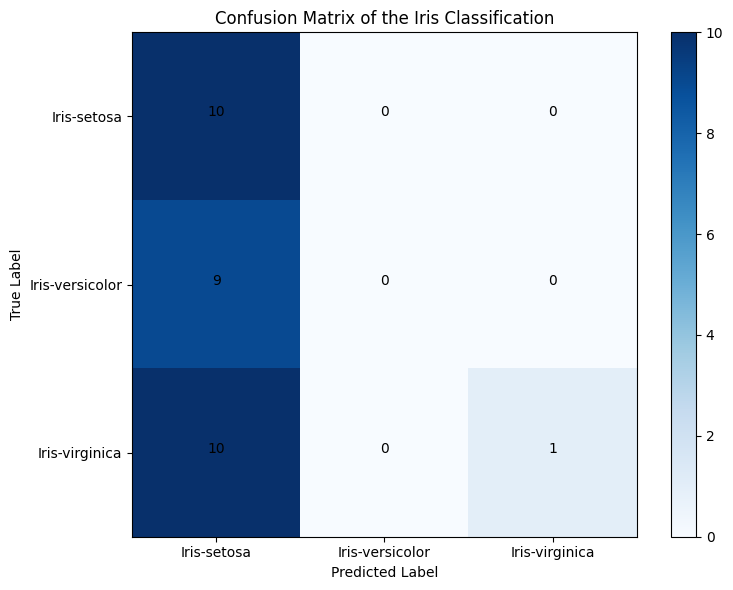

In [21]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=label_encoder.classes_)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

plt.figure(figsize=(8, 6))

# Plot the confusion matrix manually using Matplotlib
plt.imshow(conf_matrix, interpolation='nearest', cmap='Blues')
plt.title('Confusion Matrix of the Iris Classification')
plt.colorbar()

# Add tick marks and labels for classes
class_names = label_encoder.classes_
tick_marks = range(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# Label the axes
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# Annotate the confusion matrix with counts
for i in range(len(conf_matrix)):
    for j in range(len(conf_matrix[i])):
        plt.text(j, i, str(conf_matrix[i, j]), horizontalalignment="center", color="black")

# Show the plot
plt.tight_layout()
plt.show()